## <center> **<span style="color: red">NLP</span> steps and explnation.**

Here we will use <span style="color: #ffd21e">**Hugging face**</span> trasformers pre trained models becuase it'll take so much effort to label<br>
all of our text columns "<ins>Comments, Describtion, Title</ins>" and also we will extract categorical and numirecal<br>
features from the text columns.<br><br>

##### **Steps in detail:**
<ul>
    <li>Extract categorical features from text columns sush as:<ol> 
        <li>Contains emojies
        <li>Positive or negative
        <li>language</ol>
    <li> Doing analysis for most common words in comments and titles
    <li> Extracing the length of the comments, descriptions & titles
    <li> Stemming the data and tekonizing it
    <li> Saving those new data into new <strong>one</strong> Df to use in the final ML model

## <center> **Importing the <span style="color: red">Packeges</span>**<br>
<img src="https://www.clipartmax.com/png/small/241-2411667_view-more-youtube-gaming-logo-png.png" alt="View More - Youtube Gaming Logo Png @clipartmax.com">

In [36]:
import os
import nltk
import emoji
import sqlite3
import pandas as pd
import numpy as np
import transformers
import huggingface_hub

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import (WordCloud,
                       STOPWORDS,
                       ImageColorGenerator)
huggingface_hub.notebook_login()

## <center> **Reading the <span style="color: red">data</span>**

In [2]:
con = sqlite3.connect('../database.db')

df = pd.read_sql_query("""   
                        
                        SELECT *
                        FROM base_videos AS bv

                        INNER JOIN base_channels  AS bc ON
                            bc.channel_name = bv.channelTitle

                        INNER JOIN comments  AS c ON
                            c.video_id = bv.video_id""", con)

con.close()

df = df.T.drop_duplicates().T # dropping duplicated cols

In [3]:
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,definition,duration_in_minutes,subscribers,total_views,date,video_count,about,country,comments,like_counts,reply_counts
0,N6dYG0FwFvk,Tribe Gaming,BEST MOMENTS OF TRIBE GAMING! (2022),TRIBE GAMING - BEST OF 2022! \n\n2022 was a he...,"['Tribe', 'Tribe Gaming', 'Gaming', 'Mobile', ...",2023-01-17 19:15:01+00:00,45177,2540,292,hd,14.835938,488000,101639693,2017-02-27 00:00:00,453,Mobile gaming content and esports organization...,US,2022 has been amazing. Can’t wait for 2023 Tri...,3,0
1,N6dYG0FwFvk,Tribe Gaming,BEST MOMENTS OF TRIBE GAMING! (2022),TRIBE GAMING - BEST OF 2022! \n\n2022 was a he...,"['Tribe', 'Tribe Gaming', 'Gaming', 'Mobile', ...",2023-01-17 19:15:01+00:00,45177,2540,292,hd,14.835938,488000,101639693,2017-02-27 00:00:00,453,Mobile gaming content and esports organization...,US,3:20 THAT'S WILD 💀💀💀,0,0
2,N6dYG0FwFvk,Tribe Gaming,BEST MOMENTS OF TRIBE GAMING! (2022),TRIBE GAMING - BEST OF 2022! \n\n2022 was a he...,"['Tribe', 'Tribe Gaming', 'Gaming', 'Mobile', ...",2023-01-17 19:15:01+00:00,45177,2540,292,hd,14.835938,488000,101639693,2017-02-27 00:00:00,453,Mobile gaming content and esports organization...,US,"I know this is a couple of weeks old, but does...",1,0
3,N6dYG0FwFvk,Tribe Gaming,BEST MOMENTS OF TRIBE GAMING! (2022),TRIBE GAMING - BEST OF 2022! \n\n2022 was a he...,"['Tribe', 'Tribe Gaming', 'Gaming', 'Mobile', ...",2023-01-17 19:15:01+00:00,45177,2540,292,hd,14.835938,488000,101639693,2017-02-27 00:00:00,453,Mobile gaming content and esports organization...,US,I miss Pat,0,0
4,N6dYG0FwFvk,Tribe Gaming,BEST MOMENTS OF TRIBE GAMING! (2022),TRIBE GAMING - BEST OF 2022! \n\n2022 was a he...,"['Tribe', 'Tribe Gaming', 'Gaming', 'Mobile', ...",2023-01-17 19:15:01+00:00,45177,2540,292,hd,14.835938,488000,101639693,2017-02-27 00:00:00,453,Mobile gaming content and esports organization...,US,I miss Pat in these videos.,1,0


##  <center> **Extract <span style="color: red">categorical</span> features**

#### *Extract emojies count per text*

In [4]:
comments_emojis_counts: list = []
title_emojis_counts: list = []
desc_emojis_counts: list = []

for comment, title, desc in zip(df["comments"], df["title"], df["description"]):
    
    comments_emojis_count: int = 0
    title_emojis_count: int = 0
    desc_emojis_count: int = 0
    
    for comment_char, title_char, desc_char in zip(comment, title, desc):
        
        if emoji.is_emoji(comment_char):
            comments_emojis_count += 1
            
        if emoji.is_emoji(title_char):
            title_emojis_count += 1
            
        if emoji.is_emoji(desc_char):
            desc_emojis_count += 1
    
    comments_emojis_counts.append(comments_emojis_count)
    title_emojis_counts.append(title_emojis_count)
    desc_emojis_counts.append(desc_emojis_count)

In [5]:
df["comments_emojis_count"] = comments_emojis_counts
df["title_emojis_count"] = title_emojis_counts
df["desc_emojis_count"] = desc_emojis_counts

df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,definition,...,date,video_count,about,country,comments,like_counts,reply_counts,comments_emojis_count,title_emojis_count,desc_emojis_count
1961,KL76z3lqycA,Grizzley Gang Gaming,Episode 19.1: A Hacker Extorted Us For $15 Mil...,TEE GRIZZLEY Playing GTA RP\nEpisode 19.1: Of ...,"['tee grizzley gta 5', 'tee grizzley', 'tee gr...",2023-03-07 01:00:08+00:00,174766,3451,524,hd,...,2021-01-19 00:00:00,1306,TEE GRIZZLEY (GRIZZLEY WORLD OWNER):\nhttps://...,US,1:05:15 the way he fell out the car 😂😂😂,0,0,3,0,0
870,sLEKloAZalM,Arekkz Gaming,Monster Hunter Rise Sunbreak Title Update 5 Ne...,"In this video, we'll be covering the latest ti...","['monster hunter rise', 'monster hunter', 'mon...",2023-03-30 16:00:41+00:00,47506,1190,240,hd,...,2013-01-12 00:00:00,5624,Arekkz Gaming is a gaming YouTube channel dedi...,GB,Jesus Loves all of you guys <3,0,0,0,0,0
129,T5m2wtRVLYk,kAN Gaming,I Asked a Steam Train Expert to Test my Locomo...,Hey everyone back with more Scrap Mechanic! To...,"['kan gaming', 'scrap mechanic', 'scrap mechan...",2023-02-25 00:18:19+00:00,67800,3358,249,hd,...,2016-01-01 00:00:00,1496,Video games for life!\n\n\n,CA,Make a survival servies with hyce,0,0,0,0,0
1232,g-TJep_SvlI,Kitt Gaming,Luckiest Fruit Notifier In Blox Fruits,Check out the Full VIDEO: https://www.youtube....,"['blox fruits', 'blox fruit', 'Blox fruit live...",2023-01-20 02:00:22+00:00,1002750,69194,1429,hd,...,2012-10-05 00:00:00,333,"We Love Blox Fruits Roblox, Jiu-Jitsu And Food...",US,Omg kittgaming like me😍 am big fan❤,0,0,2,0,0
1804,Thrcx6E-AqQ,الجندي جيمنج _ELGENDY GAMING,شرح حدث دوري الابطال ب التفصيل✅ ومكان توكن UCL🤯,شرح حدث دوري الابطال ب التفصيل✅ ومكان توكن UCL...,"['شرح حدث دوري ابطال اوروبا فيفا 21 موبايل', '...",2023-03-30 20:31:55+00:00,9720,842,158,hd,...,2021-06-23 00:00:00,773,عمر الجندي👑 فيفا موبايل - تقريبا يومى كله فيفا...,EG,الإعلان عندي مقفل وانا ما فتحته وتحدث,0,0,0,1,1


#### *Language detection*

In [6]:
language_detector = transformers.pipeline("text-classification",
                                          model="papluca/xlm-roberta-base-language-detection",
                                          use_auth_token= True)

In [7]:
%%timeit
print(language_detector("هذا أطول نص قد تقرأه على الإطلاق إنه طويل للغاية", max_length=128))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'label': 'ar', 'score': 0.9917784333229065}]
[{'label': 'ar', 'score': 0.9917784333229065}]
[{'label': 'ar', 'score': 0.9917784333229065}]
[{'label': 'ar', 'score': 0.9917784333229065}]
[{'label': 'ar', 'score': 0.9917784333229065}]
[{'label': 'ar', 'score': 0.9917784333229065}]
[{'label': 'ar', 'score': 0.9917784333229065}]
[{'label': 'ar', 'score': 0.9917784333229065}]
2.03 s ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Looks like we will take a lot to <ins>just classify the language</ins> of each text at least: $30\times100$ second whitch equalls <span style="color: red">**50 minutes.**</span><br>
So we can't do translation for now becuase it at least may take **5 hours** to run so we will just use this language detetion and<br>
optimize it by just sellecting one text column to detect which will be **Description column** and use the detected languages to<br>
pridect video and comments language.<br><br>
But we will detect the language using the **country of this video**

In [8]:
df["country"].unique()

array(['US', 'GB', 'CA', 'AU', 'IN', 'IT', 'PK', 'DZ', 'FR', 'TH', 'TW',
       'BG', 'DE', 'SA', 'PH', 'KR', 'BD', 'NP', 'SG', 'BR', 'EG'],
      dtype=object)

In [9]:
country_languages = {
    'US': 'English',
    'GB': 'English',
    'CA': 'English',
    'AU': 'English',
    'IN': 'Hindi',
    'IT': 'Italian',
    'PK': 'Urdu',
    'DZ': 'Arabic',
    'FR': 'French',
    'TH': 'Thai',
    'TW': 'Chinese',
    'BG': 'Bulgarian',
    'DE': 'German',
    'SA': 'Arabic',
    'PH': 'Tagalog',
    'KR': 'Korean',
    'BD': 'Bengali',
    'NP': 'Nepali',
    'SG': 'English',
    'BR': 'Portuguese',
    'EG': 'Arabic'}

df["language"] = df["country"].replace(country_languages)

This wy may not be so accurate in detecting languages becuase there are some **indian videos** specifically with english and<br>
because some commetns come in deffrint languages but at least this way is more accurate than `roberta-language-detection`<br>
model because this model sometimes come with wierd 

#### *Sentiment analysis*

In [10]:
sentiment_classifier = transformers.pipeline(model= "finiteautomata/bertweet-base-sentiment-analysis")
print(sentiment_classifier("Hello here in my analysis, Have a nice day !!"))

Downloading:   0%|          | 0.00/2.70k [00:00<?, ?B/s]

[{'label': 'POS', 'score': 0.9883897304534912}]


In [11]:
def my_sentiment_classifier(text: str) -> np.int8:
    """This code takes a text and return you if it's positive
        or negative as 1 for positive, 0 for natural -1 for negative
        and -10 for unclassified.
    
    @params: a string text
    @return: 1, 0 or -1 in np.int8 dtype"""
    
    sentiment_type_encoder: dict = {"POS": 1,
                                    "NEG": -1,
                                    "NEU": 0,
                                    "unclassified": -10}
    
    try:
        sentiment_type: str = sentiment_classifier(text)[0]["label"]
        
    except:
        sentiment_type: str = "unclassified"
        
    return  np.int8(sentiment_type_encoder[sentiment_type])

In [12]:
df["sentiments"] = df["comments"][:5].apply(
    lambda x: my_sentiment_classifier(x))

In [13]:
df[["sentiments", "comments"]]

,sentiments,comments
0,1.0,2022 has been amazing. Can’t wait for 2023 Tri...
1,0.0,3:20 THAT'S WILD 💀💀💀
2,0.0,"I know this is a couple of weeks old, but does..."
3,1.0,I miss Pat
4,1.0,I miss Pat in these videos.
...,...,...
2035,NaN,The mafia 💙💙ko bulau
2036,NaN,Tu khali bakchodi hi karta he kiya .. game pla...
2037,NaN,Tufan is good 😊
2038,NaN,very nice video❤❤❤


## <center><strong>Text visualiztion with<span style = "color: red"> WordCloud</span></strong></center>

In [31]:
coloring = np.array(Image.open("../imgs/youtube_gaming_logo.png"))
stopwords = set(STOPWORDS)

comments = ''.join(df["comments"].values.flatten())

NotImplementedError: Gray-scale images TODO

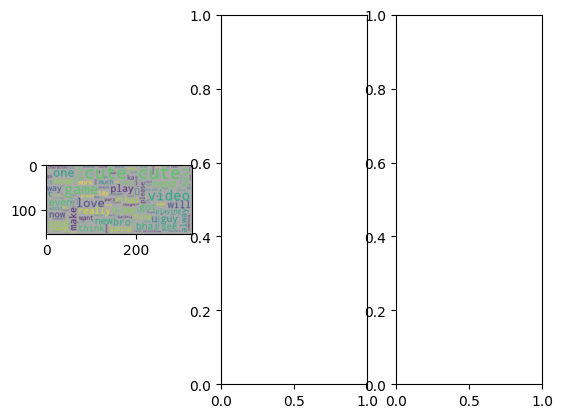

In [42]:
wc = WordCloud(background_color= "darkgrey", max_words= 2000, mask= coloring,
               stopwords= stopwords, max_font_size= 40, random_state= 42)

wc.generate(comments)
image_colors = ImageColorGenerator(np.array(coloring))

fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")


axes[1].imshow(wc.recolor(color_func= image_colors), interpolation="bilinear")
axes[2].imshow(coloring, cmap= plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
    
plt.show()

In [34]:
comments[:1000]

"2022 has been amazing. Can’t wait for 2023 Tribe!! ❤❤❤❤3:20 THAT'S WILD 💀💀💀I know this is a couple of weeks old, but does anyone know why people like Corey and Tom haven't been on recentlyI miss PatI miss Pat in these videos.I'm trying to spead this message it's the most important one of your lives the second coming of Jesus is near please worship  Jesus for He is the only way to go to Heaven AmenLateNubbz should be in TribeOmg am a huge fan of tribe and oh but This vid intro just is on a whole other levelPat needs to get off his vacation. Haven’t seen him in a while 😂Quick suggestion! You guys should play some smash bros for the switch would be awesome content to watch and thanks for all the memorable moments in 2022!!Tribe assemble againU guys are the best. Since im playing brawl i always watch ur content not only tribe but of each one of yoursWe need drage  cheif pat and Wassem backWere is carbfinWhat type of content are you looking forward to in 2023? 👀idea: Carl Cart\neveryone pl